In [2]:
from datetime import datetime, timedelta, timezone
import talib
from TradeMaster import Strategy, Backtest
from TradeMaster import BrokerAggregator


In [3]:
from TradeMaster.lib import crossover
from TradeMaster.test import SMA


class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

e:\2cents\master-tool\TradeMaster\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
e:\2cents\master-tool\TradeMaster\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


In [ ]:
from TradeMaster.lib import crossover
from TradeMaster.test import SMA


class SmaCross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sma_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sma_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sma_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sma_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sma_exit)):
                
                self.position.close()

In [4]:
from TradeMaster import Forwardtest

aggregator = BrokerAggregator()
aggregator.set_active_broker(
    'mt5', account_id=5026568633, password='+dBbD5Jm', server='MetaQuotes-Demo',
    path="C:\\Program Files\\MetaTrader 5\\terminal64.exe"
)
start_time = datetime.now(timezone.utc) 
end_time = datetime.now(timezone.utc) + timedelta(days=30)

ft = Forwardtest(SmaCross, symbol='EURUSD', start=start_time, end=end_time, cash=10_000, broker_aggregator=aggregator, timeframe='1m')
ft.run_live()


Logged in True
                        Open     High      Low    Close  tick_volume  spread  \
time                                                                           
2024-07-05 13:35:00  1.08257  1.08258  1.08247  1.08254           31       1   
2024-07-05 13:36:00  1.08254  1.08258  1.08253  1.08258           18       1   
2024-07-05 13:37:00  1.08258  1.08265  1.08257  1.08263           21       1   
2024-07-05 13:38:00  1.08262  1.08266  1.08258  1.08266           33       1   
2024-07-05 13:39:00  1.08266  1.08267  1.08260  1.08260           21       1   
...                      ...      ...      ...      ...          ...     ...   
2024-07-16 12:22:00  1.09026  1.09027  1.09017  1.09023           37       1   
2024-07-16 12:23:00  1.09026  1.09028  1.09017  1.09020           33       1   
2024-07-16 12:24:00  1.09020  1.09030  1.09020  1.09027           36       1   
2024-07-16 12:25:00  1.09027  1.09030  1.09021  1.09023           26       1   
2024-07-16 12:26:00  1.09

KeyboardInterrupt: 

In [ ]:
from TradeMaster.test import GOOG

bt = Backtest(GOOG, SmaCross, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()
print(stats)

e:\2cents\master-tool\TradeMaster\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample_rule, label='left')
e:\2cents\master-tool\TradeMaster\_plotting.py:660: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
e:\2cents\master-tool\TradeMaster\_plotting.py:660: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   34.962756
Equity Final [$]                  14077.26692
Equity Peak [$]                   18833.22632
Return [%]                          40.772669
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    4.093579
Volatility (Ann.) [%]               18.417848
Sharpe Ratio                         0.222262
Sortino Ratio                        0.316273
Calmar Ratio                         0.072811
Max. Drawdown [%]                  -56.222086
Avg. Drawdown [%]                   -6.070099
Max. Drawdown Duration     2606 days 00:00:00
Avg. Drawdown Duration      172 days 00:00:00
# Trades                                   83
Win Rate [%]                        37.349398
Best Trade [%]                      47.499856
Worst Trade [%]                     -17.97327
Avg. Trade [%]                    

In [ ]:
stats, heatmap = bt.optimize(
    n1=range(5, 110, 5),
    n2=range(5, 210, 5),
    #n_enter=range(15, 35, 5),
    #n_exit=range(10, 25, 5),
    constraint=lambda p: p.n1 < p.n2,
    maximize='Sharpe Ratio',
    #max_tries=200,
    random_state=0,
    return_heatmap=True)

e:\2cents\master-tool\TradeMaster\backtesting.py:1539: UserWarning: Searching for best of 630 configurations.
  output = _optimize_grid()


  0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
stats._strategy
stats

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   26.908752
Equity Final [$]                   27346.6579
Equity Peak [$]                   29960.37486
Return [%]                         173.466579
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   12.527048
Volatility (Ann.) [%]               15.796729
Sharpe Ratio                         0.793015
Sortino Ratio                        1.348836
Calmar Ratio                         0.894055
Max. Drawdown [%]                  -14.011496
Avg. Drawdown [%]                   -3.979158
Max. Drawdown Duration      510 days 00:00:00
Avg. Drawdown Duration       74 days 00:00:00
# Trades                                   57
Win Rate [%]                        47.368421
Best Trade [%]                      47.499856
Worst Trade [%]                     -8.933415
Avg. Trade [%]                    

In [ ]:
bt.plot()

e:\2cents\master-tool\TradeMaster\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample_rule, label='left')
e:\2cents\master-tool\TradeMaster\_plotting.py:660: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
e:\2cents\master-tool\TradeMaster\_plotting.py:660: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p3659', ...)

In [ ]:
heatmap
heatmap.sort_values().iloc[-3:]
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2,20,40,60,80,100,120,140,160,180,200
n1,,,,,,,,,,
10,0.658271,0.554650,0.094997,0.254771,-0.003225,0.027073,-0.102349,0.102730,0.067252,0.066047
20,NaN,0.278555,-0.089046,-0.410748,-0.011848,0.077422,-0.319318,-0.051926,-0.147064,0.023732
30,NaN,-0.171248,-0.124047,-0.142323,0.134942,0.104611,-0.126414,-0.142701,0.009571,-0.019216
40,NaN,NaN,-0.012680,0.032017,0.060395,0.211773,0.088390,-0.127131,-0.002409,-0.233784
50,NaN,NaN,-0.022495,-0.039836,0.261341,0.225659,-0.171720,-0.301133,-0.164301,-0.212007
60,NaN,NaN,NaN,0.001869,0.040327,-0.007891,-0.284669,-0.094587,-0.158763,-0.339259
70,NaN,NaN,NaN,0.151770,-0.083568,-0.113929,-0.368093,-0.200798,-0.242771,-0.282200
80,NaN,NaN,NaN,NaN,-0.200234,-0.224870,-0.248854,-0.259253,-0.185920,-0.305577
90,NaN,NaN,NaN,NaN,0.168071,-0.264154,-0.135392,-0.387253,-0.144396,-0.234549


<Axes: xlabel='n2', ylabel='n1'>

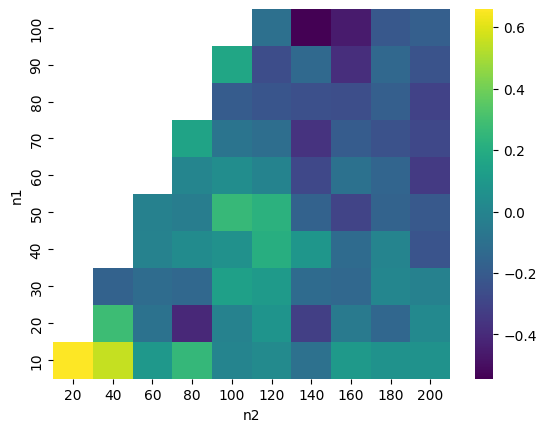

In [ ]:
%matplotlib inline

import seaborn as sns


sns.heatmap(hm[::-1], cmap='viridis')

In [ ]:
stats['_equity_curve'] 

,Equity,DrawdownPct,DrawdownDuration
2004-08-19,10000.0000,0.000000,NaT
2004-08-20,10000.0000,0.000000,NaT
2004-08-23,10000.0000,0.000000,NaT
2004-08-24,10000.0000,0.000000,NaT
2004-08-25,10000.0000,0.000000,NaT
...,...,...,...
2013-02-25,77109.4945,0.188448,NaT
2013-02-26,77047.4145,0.189102,NaT
2013-02-27,77983.4645,0.179250,NaT
2013-02-28,78121.2045,0.177801,NaT


In [ ]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
0,-57,79,87,173.08314,183.90,-616.56102,-0.062495,2004-12-10,2004-12-22,None,12 days
1,50,87,115,184.26780,215.55,1564.11000,0.169765,2004-12-22,2005-02-02,None,42 days
2,-50,115,117,215.11890,206.47,432.44500,0.040205,2005-02-02,2005-02-04,None,2 days
3,55,117,128,206.88294,196.50,-571.06170,-0.050188,2005-02-04,2005-02-22,None,18 days
4,-55,128,161,196.10700,193.09,165.93500,0.015384,2005-02-22,2005-04-11,None,48 days
5,56,161,244,193.47618,293.60,5606.93392,0.517499,2005-04-11,2005-08-08,None,119 days
6,-56,244,268,293.01280,301.75,-489.28320,-0.029818,2005-08-08,2005-09-12,None,35 days
7,53,268,297,302.35350,345.80,2302.66450,0.143694,2005-09-12,2005-10-21,None,39 days
8,-53,297,298,345.10840,343.37,92.13520,0.005037,2005-10-21,2005-10-24,None,3 days
9,53,298,365,344.05674,430.57,4585.20278,0.251451,2005-10-24,2006-01-31,None,99 days
